In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
path.append('../../src/')
#path.append('../../../src/tools')
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSingleDimension2 import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
from Utils import *
import math
dim = 5
a = 0
b = 1
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=True)
grid_single_dim = GlobalBSplineGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim2 = GlobalLagrangeGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=True)


Cannot plot function with dim > 2
Exact integral 2295.50440315
Reference solution: 2295.50440315
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 237225.441491 total surplus error: 2181732.73774
combiintegral: -1213724.23757
Current error: 529.73966868
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 103599.006478 total surplus error: 1113205.2239
combiintegral: -168349.489666
Current error: 74.338778804
Finished refinement
Refined  10  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 3573
max surplus error: 142371.359158 total surplus error

Current error: 0.0108570196252
Finished refinement
Refined  18  times
Curent number of function evaluations 563783
max surplus error: 0.419475736294 total surplus error: 36.3348974987
combiintegral: 2274.08801221
Current error: 0.00932971024035
Finished refinement
Refined  30  times
Curent number of function evaluations 577865
max surplus error: 0.461836712365 total surplus error: 32.4661894145
combiintegral: 2277.98234898
Current error: 0.00763320433869
Finished refinement
Refined  16  times
Curent number of function evaluations 584129
max surplus error: 0.203126174159 total surplus error: 26.940841333
combiintegral: 2280.65448052
Current error: 0.00646913271413
Finished refinement
Refined  76  times
New lmax: [8, 8, 8, 8, 8]
Curent number of function evaluations 613030
max surplus error: 0.338613211114 total surplus error: 23.2731579538
combiintegral: 2281.58146329
Current error: 0.00606530740675
Finished refinement
Refined  36  times
Curent number of function evaluations 622102
max 

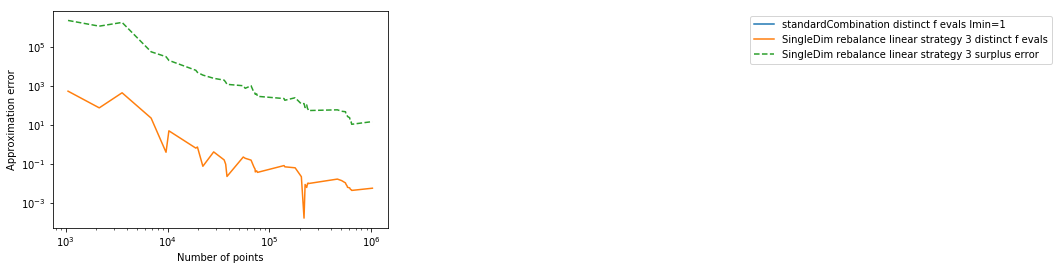

In [2]:
midpoint = np.ones(dim) * 0.99
coefficients = np.array([ float(10**1) * (d+1) for d in range(dim)])
f = GenzProductPeak(midpoint=midpoint,coefficients=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 2295.50440315
Reference solution: 2295.50440315
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 237225.441491 total surplus error: 2181732.73774
combiintegral: -1213724.23757
Current error: 529.73966868
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 103599.006478 total surplus error: 1113205.2239
combiintegral: -168349.489666
Current error: 74.338778804
Finished refinement
Refined  10  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 3573
max surplus error: 142371.359158 total surplus error

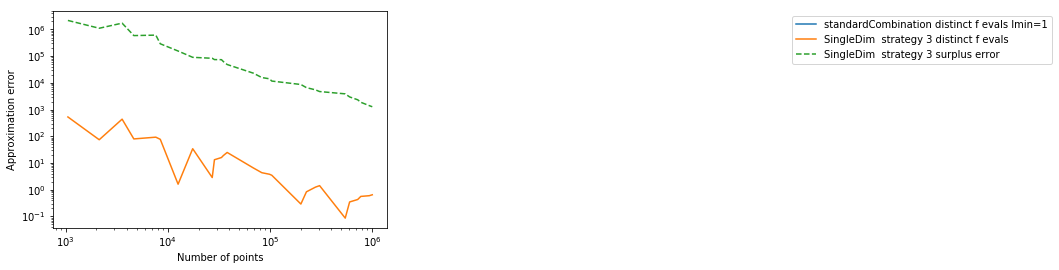

In [3]:
midpoint = np.ones(dim) * 0.99
coefficients = np.array([ float(10**1) * (d+1) for d in range(dim)])
f = GenzProductPeak(midpoint=midpoint,coefficients=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 2295.50440315
Reference solution: 2295.50440315
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 237225.441491 total surplus error: 2181732.73774
combiintegral: -1213724.23757
Current error: 529.73966868
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 103599.006478 total surplus error: 1113205.2239
combiintegral: -168349.489666
Current error: 74.338778804
Finished refinement
Refined  10  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 3573
max surplus error: 142371.359158 total surplus error

Current error: 0.0108570196252
Finished refinement
Refined  18  times
Curent number of function evaluations 563783
max surplus error: 0.419475736294 total surplus error: 36.3348974987
combiintegral: 2274.08801221
Current error: 0.00932971024035
Finished refinement
Refined  30  times
Curent number of function evaluations 577865
max surplus error: 0.461836712365 total surplus error: 32.4661894145
combiintegral: 2277.98234898
Current error: 0.00763320433869
Finished refinement
Refined  16  times
Curent number of function evaluations 584129
max surplus error: 0.203126174159 total surplus error: 26.940841333
combiintegral: 2280.65448052
Current error: 0.00646913271413
Finished refinement
Refined  76  times
New lmax: [8, 8, 8, 8, 8]
Curent number of function evaluations 613030
max surplus error: 0.338613211114 total surplus error: 23.2731579538
combiintegral: 2281.58146329
Current error: 0.00606530740675
Finished refinement
Refined  36  times
Curent number of function evaluations 622102
max 

Current error: 0.560653347917
Finished refinement
Refined  102  times
New lmax: [9, 10, 10, 10, 11]
Curent number of function evaluations 939542
max surplus error: 11.180415646 total surplus error: 1404.83055471
combiintegral: 3663.94261489
Current error: 0.596138351932
Finished refinement
Refined  20  times
Curent number of function evaluations 1004517
max surplus error: 5.49268944953 total surplus error: 1278.66217961
combiintegral: 3777.17259755
Current error: 0.645465193781
Number of refinements 616
Number of distinct points used during the refinement 1004517
Time used (s): 14809.091166496277
Final error: 0.645465193781
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
CombiSolution [-1213724.23757347]
Analytic Solution 2295.50440315
Difference 1216019.74198
0 [1, 1, 1, 1, 3] 1.0
1 [1, 1, 1, 2, 2] 1.0
2 [1, 1, 1, 3, 1] 1.0
3 [1, 1, 2, 1, 2] 1.0
4 [1, 1, 2, 2, 1] 1.0
5 [1, 1, 3, 1, 1] 1.0
6 [1, 2, 1, 

CombiSolution [-8051.95390795]
Analytic Solution 2295.50440315
Difference 10347.4583111
0 [1, 1, 1, 1, 7] 1.0
1 [1, 1, 1, 2, 6] 1.0
2 [1, 1, 1, 3, 5] 1.0
3 [1, 1, 1, 4, 4] 1.0
4 [1, 1, 1, 5, 3] 1.0
5 [1, 1, 1, 6, 2] 1.0
6 [1, 1, 1, 7, 1] 1.0
7 [1, 1, 2, 1, 6] 1.0
8 [1, 1, 2, 2, 5] 1.0
9 [1, 1, 2, 3, 4] 1.0
10 [1, 1, 2, 4, 3] 1.0
11 [1, 1, 2, 5, 2] 1.0
12 [1, 1, 2, 6, 1] 1.0
13 [1, 1, 3, 1, 5] 1.0
14 [1, 1, 3, 2, 4] 1.0
15 [1, 1, 3, 3, 3] 1.0
16 [1, 1, 3, 4, 2] 1.0
17 [1, 1, 3, 5, 1] 1.0
18 [1, 1, 4, 1, 4] 1.0
19 [1, 1, 4, 2, 3] 1.0
20 [1, 1, 4, 3, 2] 1.0
21 [1, 1, 4, 4, 1] 1.0
22 [1, 1, 5, 1, 3] 1.0
23 [1, 1, 5, 2, 2] 1.0
24 [1, 1, 5, 3, 1] 1.0
25 [1, 1, 6, 1, 2] 1.0
26 [1, 1, 6, 2, 1] 1.0
27 [1, 1, 7, 1, 1] 1.0
28 [1, 2, 1, 1, 6] 1.0
29 [1, 2, 1, 2, 5] 1.0
30 [1, 2, 1, 3, 4] 1.0
31 [1, 2, 1, 4, 3] 1.0
32 [1, 2, 1, 5, 2] 1.0
33 [1, 2, 1, 6, 1] 1.0
34 [1, 2, 2, 1, 5] 1.0
35 [1, 2, 2, 2, 4] 1.0
36 [1, 2, 2, 3, 3] 1.0
37 [1, 2, 2, 4, 2] 1.0
38 [1, 2, 2, 5, 1] 1.0
39 [1, 2, 3, 1, 4] 1.0
40

CombiSolution [-79699.09680572]
Analytic Solution 2295.50440315
Difference 81994.6012089
0 [1, 1, 1, 1, 8] 1.0
1 [1, 1, 1, 2, 7] 1.0
2 [1, 1, 1, 3, 6] 1.0
3 [1, 1, 1, 4, 5] 1.0
4 [1, 1, 1, 5, 4] 1.0
5 [1, 1, 1, 6, 3] 1.0
6 [1, 1, 1, 7, 2] 1.0
7 [1, 1, 1, 8, 1] 1.0
8 [1, 1, 2, 1, 7] 1.0
9 [1, 1, 2, 2, 6] 1.0
10 [1, 1, 2, 3, 5] 1.0
11 [1, 1, 2, 4, 4] 1.0
12 [1, 1, 2, 5, 3] 1.0
13 [1, 1, 2, 6, 2] 1.0
14 [1, 1, 2, 7, 1] 1.0
15 [1, 1, 3, 1, 6] 1.0
16 [1, 1, 3, 2, 5] 1.0
17 [1, 1, 3, 3, 4] 1.0
18 [1, 1, 3, 4, 3] 1.0
19 [1, 1, 3, 5, 2] 1.0
20 [1, 1, 3, 6, 1] 1.0
21 [1, 1, 4, 1, 5] 1.0
22 [1, 1, 4, 2, 4] 1.0
23 [1, 1, 4, 3, 3] 1.0
24 [1, 1, 4, 4, 2] 1.0
25 [1, 1, 4, 5, 1] 1.0
26 [1, 1, 5, 1, 4] 1.0
27 [1, 1, 5, 2, 3] 1.0
28 [1, 1, 5, 3, 2] 1.0
29 [1, 1, 5, 4, 1] 1.0
30 [1, 1, 6, 1, 3] 1.0
31 [1, 1, 6, 2, 2] 1.0
32 [1, 1, 6, 3, 1] 1.0
33 [1, 1, 7, 1, 2] 1.0
34 [1, 1, 7, 2, 1] 1.0
35 [1, 1, 8, 1, 1] 1.0
36 [1, 2, 1, 1, 7] 1.0
37 [1, 2, 1, 2, 6] 1.0
38 [1, 2, 1, 3, 5] 1.0
39 [1, 2, 1, 4, 4] 1.0
4

CombiSolution [-29040.51982255]
Analytic Solution 2295.50440315
Difference 31336.0242257
0 [1, 1, 1, 1, 9] 1.0
1 [1, 1, 1, 2, 8] 1.0
2 [1, 1, 1, 3, 7] 1.0
3 [1, 1, 1, 4, 6] 1.0
4 [1, 1, 1, 5, 5] 1.0
5 [1, 1, 1, 6, 4] 1.0
6 [1, 1, 1, 7, 3] 1.0
7 [1, 1, 1, 8, 2] 1.0
8 [1, 1, 1, 9, 1] 1.0
9 [1, 1, 2, 1, 8] 1.0
10 [1, 1, 2, 2, 7] 1.0
11 [1, 1, 2, 3, 6] 1.0
12 [1, 1, 2, 4, 5] 1.0
13 [1, 1, 2, 5, 4] 1.0
14 [1, 1, 2, 6, 3] 1.0
15 [1, 1, 2, 7, 2] 1.0
16 [1, 1, 2, 8, 1] 1.0
17 [1, 1, 3, 1, 7] 1.0
18 [1, 1, 3, 2, 6] 1.0
19 [1, 1, 3, 3, 5] 1.0
20 [1, 1, 3, 4, 4] 1.0
21 [1, 1, 3, 5, 3] 1.0
22 [1, 1, 3, 6, 2] 1.0
23 [1, 1, 3, 7, 1] 1.0
24 [1, 1, 4, 1, 6] 1.0
25 [1, 1, 4, 2, 5] 1.0
26 [1, 1, 4, 3, 4] 1.0
27 [1, 1, 4, 4, 3] 1.0
28 [1, 1, 4, 5, 2] 1.0
29 [1, 1, 4, 6, 1] 1.0
30 [1, 1, 5, 1, 5] 1.0
31 [1, 1, 5, 2, 4] 1.0
32 [1, 1, 5, 3, 3] 1.0
33 [1, 1, 5, 4, 2] 1.0
34 [1, 1, 5, 5, 1] 1.0
35 [1, 1, 6, 1, 4] 1.0
36 [1, 1, 6, 2, 3] 1.0
37 [1, 1, 6, 3, 2] 1.0
38 [1, 1, 6, 4, 1] 1.0
39 [1, 1, 7, 1, 3] 1.0
4

CombiSolution [ 6170.42171398]
Analytic Solution 2295.50440315
Difference 3874.91731083
[1053, 3753, 12033, 36033, 102785, 282625, 754945, 1969665] [529.73966867958995, 67.472199458990787, 140.3498401442738, 101.7566380409574, 4.5077057124801838, 35.719644491376734, 13.65104078332803, 1.6880461242042823] Number of Points Standard lmin= 1
[1053, 3753, 12033, 36033, 102785, 282625, 754945, 1969665] [529.73966867958995, 67.472199458990787, 140.3498401442738, 101.7566380409574, 4.5077057124801838, 35.719644491376734, 13.65104078332803, 1.6880461242042823] Distinct f evaks Standard lmin= 1
[1053, 3753, 12033, 36033, 102785, 282625, 754945, 1969665] [2019360456.3710034, 1394108638.446574, 1096946142.7222383, 709907649.02335668, 283215118.70110011, 157120310.88485602, 105704917.44131289, 49783881.911137052] L2 interpolation error lmin= 1
[1053, 3753, 12033, 36033, 102785, 282625, 754945, 1969665] [166370815.46485648, 421979728.46158105, 125263520.54656258, 176765129.19262496, 133253713.043680

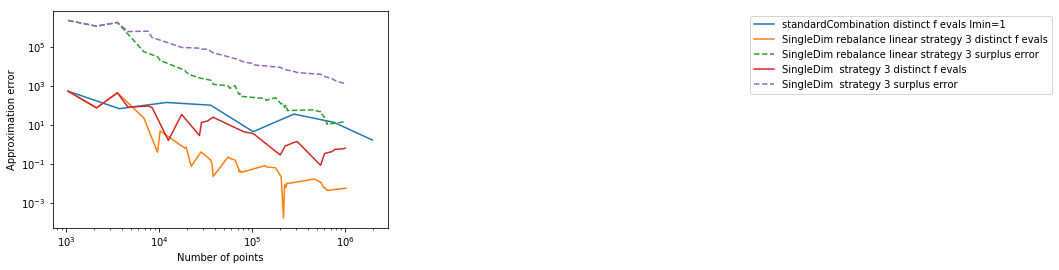

In [4]:
midpoint = np.ones(dim) * 0.99
coefficients = np.array([ float(10**1) * (d+1) for d in range(dim)])
f = GenzProductPeak(midpoint=midpoint,coefficients=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3'), (adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,9,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )
